# Principal Component Analysis
Principal component analysis (PCA) is a technique of dimensionality reduction, which linearly
maps data onto a lower-dimensional space, so that the variance of the projected data in the associated
dimensions would be maximized. In this problem, you will perform PCA on a dataset of face
images.
https://github.com/ChahalSandeep/PCA-and-Eigen-Faces

In [27]:
from tkinter import Toplevel, Label
import matplotlib.pyplot as plt #plot import
import matplotlib.colors  #color import
import numpy as np  #importing numpy
from PIL import Image #importing PIL to read all kind of images
from PIL import ImageTk
import glob

def displaying_faces_grid(displaying_faces):
    size=100, 100
    #fig1=plt.figure('name')
    fig1, axes_array = plt.subplots(5, 5)
    fig1.set_size_inches(5,5)
    count=0
    for x in range(5):
        for y in range (5):
            #if images are taken
            draw_image = displaying_faces[count]
            draw_image.thumbnail(size)
            draw_image= np.asarray(draw_image,dtype=float)/255.0
            #if arrays are taken
            """print_image=faces_list[count]
            print_image.resize((100, 100), refcheck=False)
            #print_image=print_image.resize(size)"""
            image_plot=axes_array[x][y].imshow(draw_image,cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count=count+1
    fig1.canvas.set_window_title('Displaying all faces')
    plt.show()
def display_mean_face(face_array):
    mean = np.mean(face_array, 0)
    fig2, axes_array = plt.subplots(1, 1)
    fig2.set_size_inches(5, 5)
    axes_array.axis('off')
    image_plot = axes_array.imshow(mean, cmap=plt.cm.gray)
    fig2.canvas.set_window_title('mean faces')
    plt.show()
    return mean

def performing_pca(face_array):
    print("MEAN FACE DISPLAY")
    mean = display_mean_face(face_array)
    # flattening array
    flatten_Array = []
    for x in range(len(face_array)):
        flat_Array = face_array[x].flatten()
        flatten_Array.append(flat_Array)
    flatten_Array = np.asarray(flatten_Array)
    mean = mean.flatten()
    # flatten_Array=flatten_Array.T
    #print(flatten_Array.shape)
    #face_array = face_array.flatten()
    # mean=mean.T
    #substract_mean_from_original = np.subtract(flatten_Array, mean)
    # transpose_substract_mean_from_original=substract_mean_from_original.T
    # eigen_faces=displaying_eigen_faces(face_array,mean)
    #covariance_matrix = np.cov(substract_mean_from_original)
    #eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    return mean,flatten_Array,
def display_all(images):
    fig3, axes_array = plt.subplots(5, 5)
    fig3.set_size_inches(5, 5)
    count = 0
    for x in range(5):
        for y in range(5):
            draw_image = images[count]
            image_plot = axes_array[x][y].imshow(draw_image, cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count = count + 1
    fig3.canvas.set_window_title('Eigen Faces')
    plt.show()
def reading_faces_and_displaying():
    face_array = []
    displaying_faces = []
    for face_images in glob.glob('/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/*.png'): # assuming jpg
        face_image=Image.open(face_images)
        #print(np.shape(face_image))
        displaying_faces.append(face_image)
        face_image = np.asarray(face_image,dtype=float)/255.0
        face_array.append(face_image)
    print("DISPLAYING ORIGINAL FACES")
    print(len(face_array))
    displaying_faces_grid(displaying_faces)
    face_array=np.asarray(face_array)
    return face_array


DISPLAYING ORIGINAL FACES
360


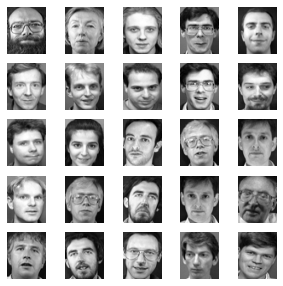

MEAN FACE DISPLAY


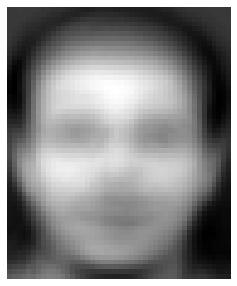

EIGEN FACES


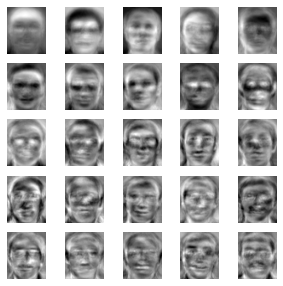

In [28]:
face_array=reading_faces_and_displaying()
mean,flatten_Array=performing_pca(face_array) # eigen_values,eigen_vectors
substract_mean_from_original = np.subtract(flatten_Array, mean)
U, s, V = np.linalg.svd(substract_mean_from_original, full_matrices=False)
Eigen_faces=[]

for x in range(V.shape[0]):
    fig=np.reshape(V[x],(56,46))
    Eigen_faces.append(fig)
print("EIGEN FACES")
display_all(Eigen_faces)

## Task2
Select top k eigenfaces (eigenvectors which corresponds to the largest eigen values) Reconstruct training faces and display reconstructed faces. Repeat process for k=5 and k=15 and k= 25.



RECONSTRUCTING FACES FOR K=3
mse: 0.011484804436324984


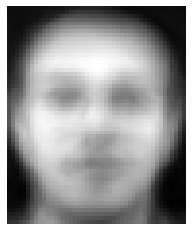

RECONSTRUCTING FACES FOR K=50
mse: 0.003637897867387184


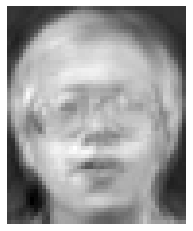

RECONSTRUCTING FACES FOR K=170
mse: 0.0007184475159942509


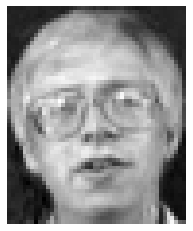

RECONSTRUCTING FACES FOR K=240
mse: 0.00020556111119777475


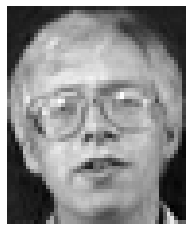

RECONSTRUCTING FACES FOR K=345
mse: 3.3130945138033625e-06


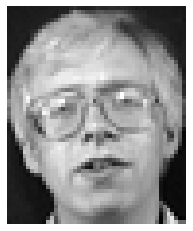

In [42]:
"""def display_reconstruction(images):
    fig4, axes_array = plt.subplots(1, 1)
    fig4.set_size_inches(1, 1)
    count = 14
    for x in range(1):
        for y in range(1):
            draw_image = np.reshape(images[count,:],(56,46))
            image_plot = axes_array[x][y].imshow(draw_image, cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            #count = count + 1
    fig4.canvas.set_window_title('Reconstructed faces for k='+str(k))
    plt.show()"""
def display_reconstruction(images, img_n):
    count = img_n
    
    draw_image = np.reshape(images[count,:],(56,46))
    draw_image
    image_plot = plt.imshow(draw_image, cmap=plt.cm.gray)
    plt.axis('off')
    #count = count + 1d
    #fig4.canvas.set_window_title('Reconstructed faces for k='+str(k))
    plt.show()
def mse_recons(images, recon_images, img_n):
    recon_img = np.reshape(recon_images[img_n,:],(56,46))
    img = np.reshape(images[img_n,:],(56,46))
    mse = np.mean(((recon_img - img)**2))
    print('mse:', mse)
def reconstructing_faces(k,mean,substract_mean_from_original,V, face_array, img_n):
    weights=np.dot(substract_mean_from_original, V.T)
    reconstruction = mean + np.dot(weights[:,0:k], V[0:k,:])
    mse_recons(face_array, reconstruction, img_n)
    display_reconstruction(reconstruction, img_n)
    

k=3
print("RECONSTRUCTING FACES FOR K="+str(k))
reconstructing_faces(k,mean,substract_mean_from_original,V, face_array, 13)
k=50
print("RECONSTRUCTING FACES FOR K="+str(k))
reconstructing_faces(k,mean,substract_mean_from_original,V, face_array, 13)
k=170
print("RECONSTRUCTING FACES FOR K="+str(k))
reconstructing_faces(k,mean,substract_mean_from_original,V, face_array, 13)
k=240
print("RECONSTRUCTING FACES FOR K="+str(k))
reconstructing_faces(k,mean,substract_mean_from_original,V, face_array, 13)
k=345
print("RECONSTRUCTING FACES FOR K="+str(k))
reconstructing_faces(k,mean,substract_mean_from_original,V, face_array, 13)

### Task 3
Load all the test image from Eigenfaces\Test. Project each image on k=2 eigen vectors and find if its face or not. If face then find the closest training image(Euclidean distance) to claculate distance The image on thr right is its closest image in the eigenfaces space. the right side is blank if it is non face.



40
FACES FOR K=2


<ipython-input-21-e172c5e73f36>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes_array = plt.subplots(1, 2)


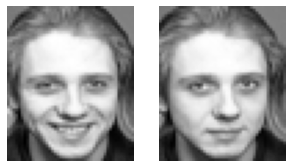

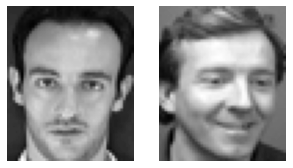

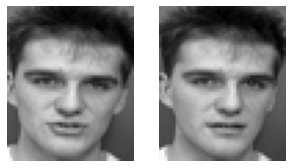

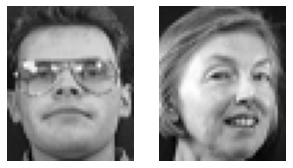

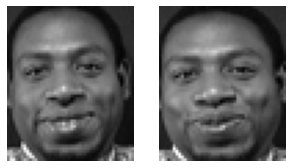

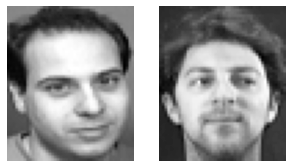

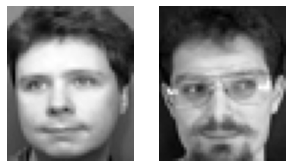

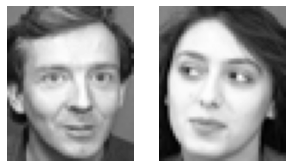

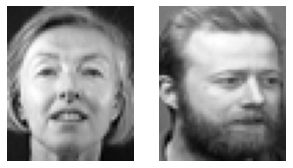

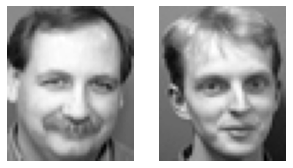

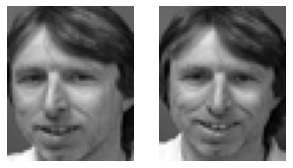

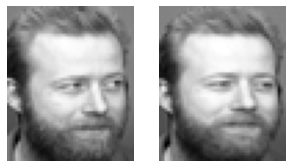

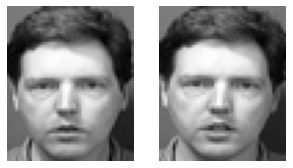

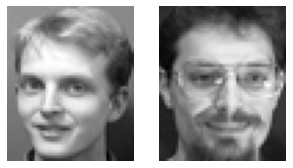

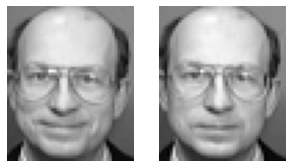

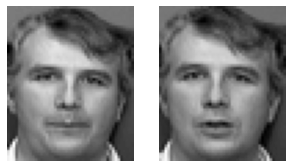

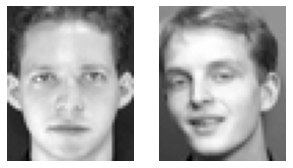

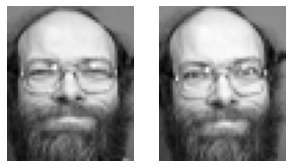

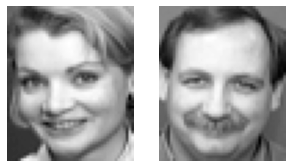

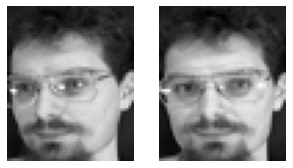

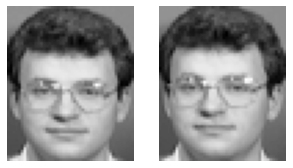

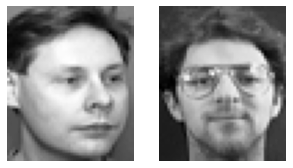

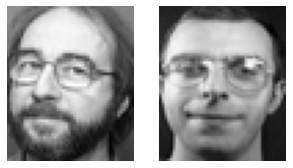

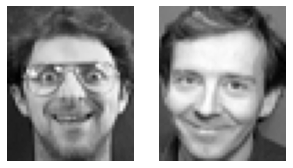

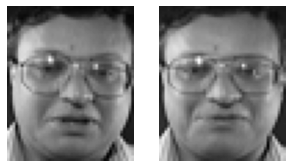

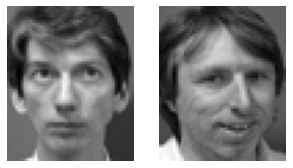

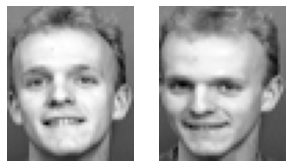

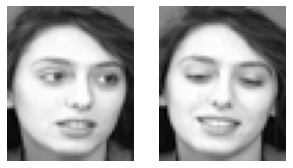

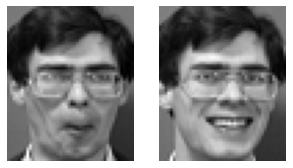

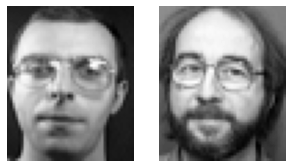

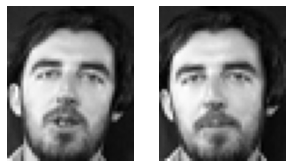

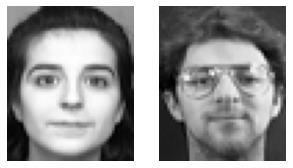

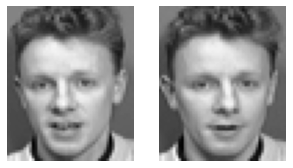

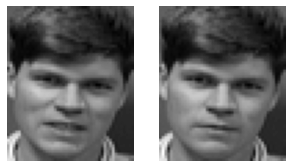

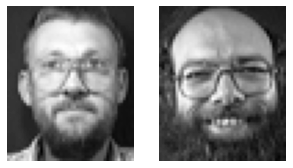

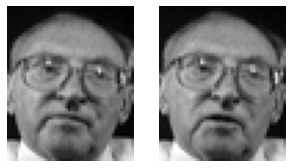

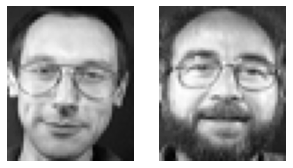

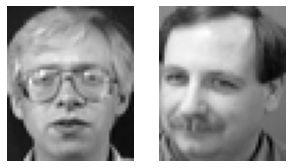

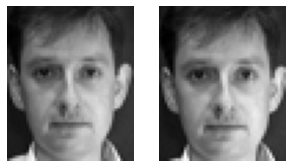

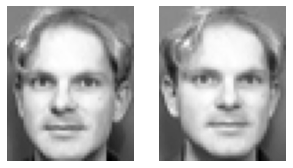

In [21]:
#-------------------------------------------------task 3--------------------------------------------------
def class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array):
    eigen_weights = np.dot(V[:k, :],substract_mean_from_original.T)
    threshold = 6000
    for i in range(test_from_mean.shape[0]):
        test_weight = np.dot(V[:k, :],test_from_mean[i:i + 1,:].T)
        distances_euclidian = np.sum((eigen_weights - test_weight) ** 2, axis=0)
        image_closest = np.argmin(np.sqrt(distances_euclidian))
        fig, axes_array = plt.subplots(1, 2)
        fig.set_size_inches(5, 5)
        to_plot=np.reshape(test_flat_images[i,:], (56,46))
        axes_array[0].imshow(to_plot, cmap=plt.cm.gray)
        axes_array[0].axis('off')
        if (distances_euclidian[image_closest] <= threshold):
            axes_array[1].imshow(face_array[image_closest,:,:], cmap=plt.cm.gray)
        axes_array[1].axis('off')
    plt.show()

def returning_vector(test_images):
    flat_test_Array = []
    for x in range(len(test_images)):
        flat_Array = test_images[x].flatten()
        flat_test_Array.append(flat_Array)
    flat_test_Array = np.asarray(flat_test_Array)
    return flat_test_Array

def reading_test_images():
    test_images=[]
    for images in glob.glob('/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/test/*.png'):  # assuming jpg
        test_faces = Image.open(images)
        test_faces = np.asarray(test_faces, dtype=float) / 255.0
        #test_faces = test_faces.convert('L')  #int
        #test_faces = np.asarray(test_faces, dtype=float) / 255.0  # Normalize the image to be between 0 to 1
        test=(425,425,3)
        if test_faces.shape == test:
            test_faces=test_faces[:,:,0]
            test_images.append(test_faces)
        else:
            test_images.append(test_faces)
    print(len(test_images))
    #print(test_images[25].shape)
    #print(test_images[25].shape[0])
    #if test_images[25].shape[0]:
    #    print("a")
    flat_test_Array=returning_vector(test_images)
    test_images=np.asarray(test_images)
    return flat_test_Array,test_images

test_flat_images,test_images=reading_test_images()
test_from_mean=np.subtract(test_flat_images,mean)

k=2
print("FACES FOR K=2")
class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array)

In [24]:
#-------------------------------------------------task 4--------------------------------------------------
"""TASK 4"""
def error_for_k(k,test_from_mean,V,substract_mean_from_original,train_list,test_list):
    count=0
    eigen_weights = np.dot(V[:k, :],substract_mean_from_original.T)
    threshold = 6000
    for x in range(test_from_mean.shape[0]):
        test_weight = np.dot(V[:k, :],test_from_mean[x:x + 1,:].T)
        distances_euclidian = np.sum((eigen_weights - test_weight) ** 2, axis=0)
        image_closest = np.argmin(np.sqrt(distances_euclidian))
        x=test_list[x]
        z=int(x[1:])
        if (distances_euclidian[image_closest] <= threshold):
            y=train_list[image_closest]
        else:
            y=0000

        if (x == y) or (z < 89 and y == 0000):
            count = count
        else:
            count = count + 1
    #print(k_image_and_prediction)

    error_rate=count/len(test_list)*100
    return error_rate,count


train_list=[]
for images in glob.glob('/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/*.png'):
    a1=images
    #_,a1 = a1.split('\\')
    #a1,_=a1.split('')
    #a1,_=a1.split('_', maxsplit=1)
    train_list.append(a1)
train_array=np.asarray(train_list)
print("TRAIN IMAGES")
print(train_list)
test_list=[]
for images in glob.glob('/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/test/*.png'):
    a1=images
    #_,a1 = a1.split('\\')
    #a1,_=a1.split('_', maxsplit=1)
    test_list.append(a1)
test_array=np.asarray(test_list)
print("TEST IMAGES ")
print(test_list)
errorrate_list=[]
k_value=[]
count_list=[]
for k in range(25):
    error_rate,count=error_for_k(k,test_from_mean,V,substract_mean_from_original,train_list,test_list)
    errorrate_list.append(error_rate)
    count_list.append(count)
    k_value.append(k)
#print("MISSCLASSIFIED PERCENTAGE")
#print(errorrate_list)
#print("MISSCLASSIFIED NUMBER OF IMAGES ")
#print(count_list)
plt.plot(np.array(k_value),np.array(errorrate_list),'ro')
plt.plot(np.array(k_value),np.array(errorrate_list),'b')
plt.axis()
plt.show()


TRAIN IMAGES
['/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/37_4.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/32_8.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/12_1.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/20_3.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/19_9.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/3_9.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/40_8.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/9_3.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/20_5.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/17_4.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/23_8.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/train/10_2.png', '/home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/trai

ValueError: invalid literal for int() with base 10: 'home/vtsai01/workspace/DLCV_2020FALL/hw1/material/p2_data/test/12_10.png'